In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline


In [2]:
df1 = pd.read_csv(r'D:\Regression\auto-mpg.csv', sep =',')

In [3]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df1['hp'] = df1['hp'].replace('?', 0)

In [6]:
df1['hp'] = pd.to_numeric(df1['hp'])

In [7]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [9]:
X = df1.iloc[:, 1:6]

In [10]:
X.head(2)

,cyl,disp,hp,wt,acc
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5


In [11]:
y = df1[['mpg']]

In [12]:
y.head(3)

,mpg
0,18.0
1,15.0
2,18.0


In [13]:
import statsmodels.api   as sm
#X = sm.add_constant(X) # Add an intercept to our model
#print(X)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [30]:
print(len(x_test))

120


In [31]:
print(len(y_test))

120


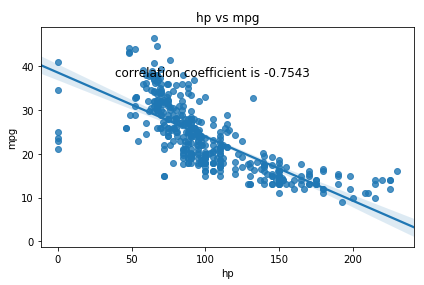

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df1.hp, y = df1.mpg, ci = 95)
corcoef = np.corrcoef(df1.hp, df1.mpg)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("hp vs mpg")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

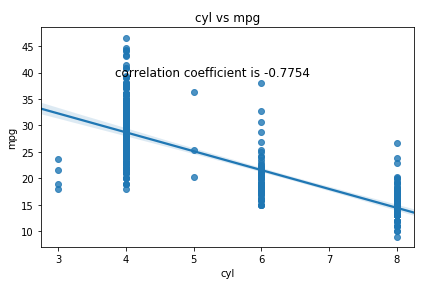

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df1.cyl, y = df1.mpg, ci = 95)
corcoef = np.corrcoef(df1.cyl, df1.mpg)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("cyl vs mpg")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

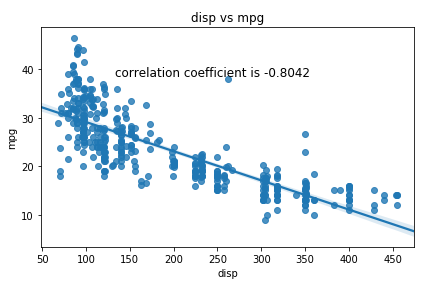

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df1.disp, y = df1.mpg, ci = 95)
corcoef = np.corrcoef(df1.disp, df1.mpg)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("disp vs mpg")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

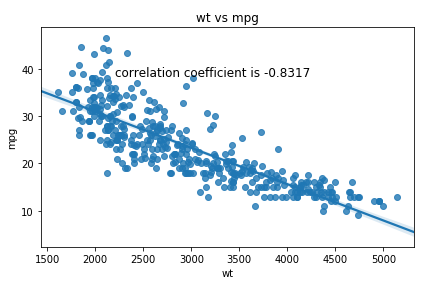

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df1.wt, y = df1.mpg, ci = 95)
corcoef = np.corrcoef(df1.wt, df1.mpg)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("wt vs mpg")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

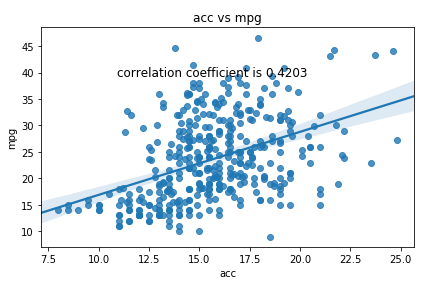

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df1.acc, y = df1.mpg, ci = 95)
corcoef = np.corrcoef(df1.acc, df1.mpg)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("acc vs mpg")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

In [21]:
X1 = X.iloc[:, 0:4]

In [22]:
X1.head()

,cyl,disp,hp,wt
0,8,307.0,130,3504
1,8,350.0,165,3693
2,8,318.0,150,3436
3,8,304.0,150,3433
4,8,302.0,140,3449


In [23]:
#import statsmodels.api as sm
#X2 = sm.add_constant(X)
#est = sm.OLS(y, X2)
#est2 = est.fit()
#print(est2.summary())

In [25]:
regr = LinearRegression()

In [26]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred = regr.predict(x_test)

In [32]:
x_test.shape

(120, 5)

In [33]:
y_test.shape

(120, 1)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [[-0.43651203 -0.00530875 -0.01385248 -0.0057168   0.03886048]]
Mean squared error: 18.49
Variance score: 0.72


In [47]:
#Intercept_result = ('Intercept: ', regr.intercept_)
print(regr.intercept_)

[44.60072817]


In [ ]:
# Plot outputs
#plt.scatter(x_test, y_test,  color='black')
#plt.plot(x_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

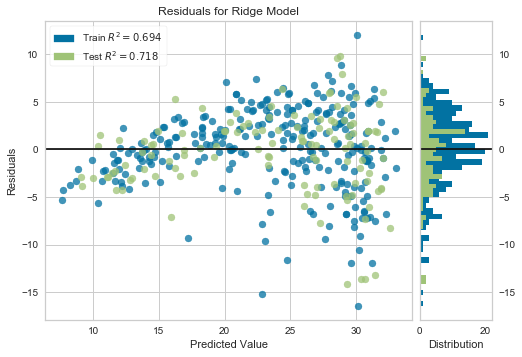

In [43]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

print(regr.intercept_)
# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(x_train, y_train)  # Fit the training data to the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()  

In [44]:
SSE = 0
SST = 0
for i in range(len(y_pred)):
    SSE += (y_pred[i] - y)**2
    
yMean = np.mean(y)
for i in range(len(y_pred)):
    SST += (y - yMean)**2
    
print('SSE = SST = ' , (SSE, SST))

rsq = np.round(1 - (SSE/SST), 4)
print("The required r value is  " ,rsq)

SSE = SST =  (              mpg
0     9509.986242
1    14583.396431
2     9509.986242
3    12652.259702
4    10961.122972
5    14583.396431
6    16754.533161
7    16754.533161
8    16754.533161
9    14583.396431
10   14583.396431
11   16754.533161
12   14583.396431
13   16754.533161
14    5843.165862
15    6105.439322
16    9509.986242
17    6596.576052
18    7249.755672
19    6540.892402
20    6072.029132
21    5843.165862
22    6072.029132
23    6540.892402
24    6596.576052
25   27839.080081
26   27839.080081
27   24707.943351
28   31210.216811
29    7249.755672
..            ...
368   7249.755672
369  18931.798562
370  12485.208752
371   9387.482212
372   7249.755672
373   5843.165862
374   5854.302592
375  24429.525102
376  27538.388372
377  12485.208752
378  30887.251642
379  24429.525102
380  24429.525102
381  24429.525102
382  18931.798562
383  30887.251642
384  14394.072022
385  30887.251642
386   6072.029132
387  30887.251642
388   6540.892402
389   6105.439322
390  14394.072

In [33]:
import pandas as pd
df2 = pd.read_csv(r'D:\Regression\insurance.csv', sep = ',')

In [34]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df2.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [37]:
df2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
df2['sex'], sex = pd.factorize(df2['sex'])

In [39]:
df2['smoker'], smoker = pd.factorize(df2['smoker'])

In [40]:
df2['region'], region = pd.factorize(df2['region'])

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [42]:
X = df2.iloc[:, 0:5]
y = df2.iloc[:, 6]

In [43]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.9240
1,18,1,33.77,1,1,1,1725.5523


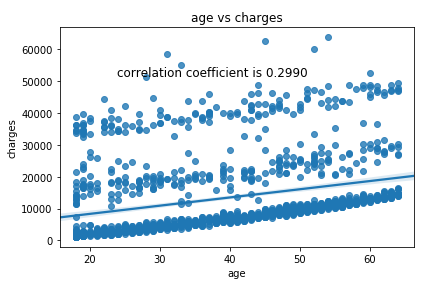

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.regplot(x = df2.age, y = df2.charges, ci = 95)
corcoef = np.corrcoef(df2.age, df2.charges)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("age vs charges")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

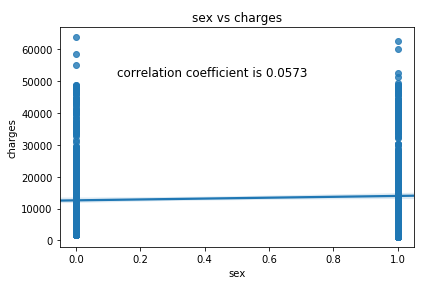

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.regplot(x = df2.sex, y = df2.charges, ci = 95)
corcoef = np.corrcoef(df2.sex, df2.charges)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("sex vs charges")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

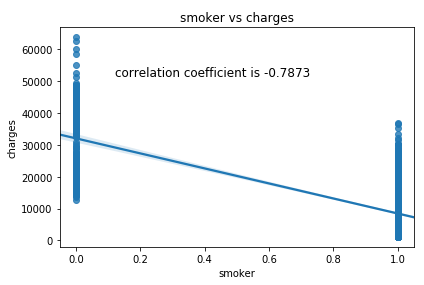

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.regplot(x = df2.smoker, y = df2.charges, ci = 95)
corcoef = np.corrcoef(df2.smoker, df2.charges)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("smoker vs charges")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

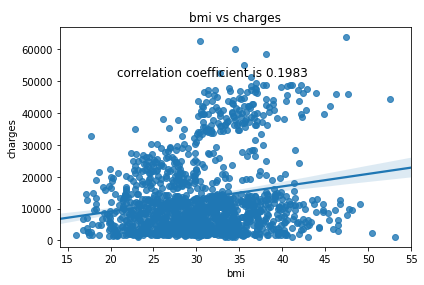

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.regplot(x = df2.bmi, y = df2.charges, ci = 95)
corcoef = np.corrcoef(df2.bmi, df2.charges)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("bmi vs charges")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

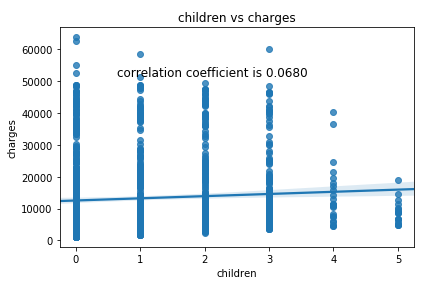

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.regplot(x = df2.children, y = df2.charges, ci = 95)
corcoef = np.corrcoef(df2.children, df2.charges)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("children vs charges")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

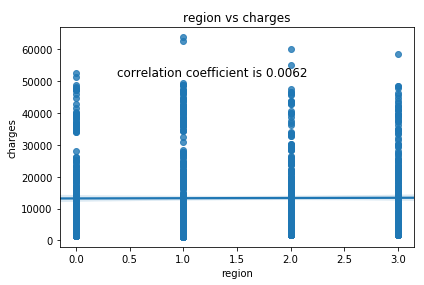

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.regplot(x = df2.region, y = df2.charges, ci = 95)
corcoef = np.corrcoef(df2.region, df2.charges)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f' %corcoef
plt.title("region vs charges")
plt.suptitle(text_cc)
plt.gcf().tight_layout()
plt.show()

In [50]:
X1 = df2[['age', 'smoker', 'sex']]
y = df2[['charges']]

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3)

In [74]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

936
402
936
402


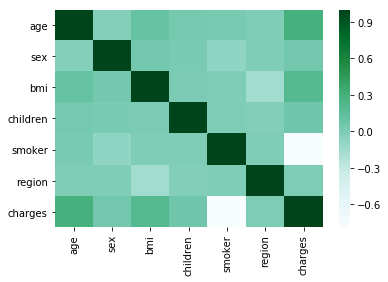

In [75]:
sns.heatmap(df2.corr(), cmap='BuGn')
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(normalize = True)
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [90]:
y_pred = clf.predict(x_test)
y_pred

array([[ 2955.87680598],
       [33248.50942069],
       [ 6391.397412  ],
       [ 5100.33246062],
       [ 4296.16159013],
       [ 8317.01594257],
       [ 8853.12985623],
       [12020.59350542],
       [ 4246.94175737],
       [ 7999.73915298],
       [ 7195.56828249],
       [12873.98420867],
       [34101.90012395],
       [12288.65046225],
       [ 4783.05567103],
       [11752.53654859],
       [36197.13594582],
       [ 9121.18681306],
       [ 8585.0728994 ],
       [13896.99220323],
       [27400.47620321],
       [37805.47768679],
       [ 4246.94175737],
       [38390.81143322],
       [12337.87029501],
       [ 5636.44637428],
       [ 5904.50333111],
       [ 9389.24376989],
       [12337.87029501],
       [30349.10272833],
       [31908.22463655],
       [ 3978.88480054],
       [34052.68029118],
       [ 9389.24376989],
       [38877.70551411],
       [10997.58551087],
       [ 8853.12985623],
       [ 4246.94175737],
       [ 9876.13785079],
       [ 4832.27550379],


In [78]:
y_pred_rounded = np.around(y_pred, 0)
y_pred_rounded 

array([[ 2956.],
       [33249.],
       [ 6391.],
       [ 5100.],
       [ 4296.],
       [ 8317.],
       [ 8853.],
       [12021.],
       [ 4247.],
       [ 8000.],
       [ 7196.],
       [12874.],
       [34102.],
       [12289.],
       [ 4783.],
       [11753.],
       [36197.],
       [ 9121.],
       [ 8585.],
       [13897.],
       [27400.],
       [37805.],
       [ 4247.],
       [38391.],
       [12338.],
       [ 5636.],
       [ 5905.],
       [ 9389.],
       [12338.],
       [30349.],
       [31908.],
       [ 3979.],
       [34053.],
       [ 9389.],
       [38878.],
       [10998.],
       [ 8853.],
       [ 4247.],
       [ 9876.],
       [ 4832.],
       [27083.],
       [11753.],
       [ 3224.],
       [10144.],
       [ 3711.],
       [ 4247.],
       [13946.],
       [13093.],
       [35710.],
       [ 3224.],
       [ 5100.],
       [ 2688.],
       [11802.],
       [ 9340.],
       [12606.],
       [ 5368.],
       [ 5855.],
       [ 2956.],
       [ 8317.

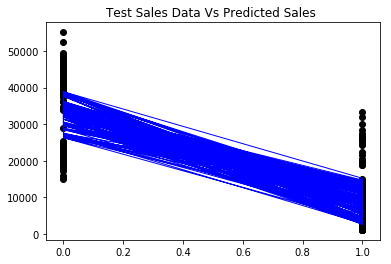

In [79]:
plt.title('Test Sales Data Vs Predicted Sales ')
plt.scatter(x_test[['smoker']], y_test,  color='black')
plt.plot(x_test[['smoker']], y_pred, color='blue', linewidth=1)
plt.show()

In [80]:
from sklearn.metrics import r2_score
print('The prediction accuracy = ', r2_score(y_test,y_pred))

The prediction accuracy =  0.7505509364167331


In [81]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[   268.05695683 -23640.42852674    218.83712407]]
Mean squared error: 37521062.61
Variance score: 0.75


In [87]:
import statsmodels.api as sm

In [88]:
X1 = sm.add_constant(X1) # adding a constant
 
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1) 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
#print(predictions)

In [92]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1151.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:30:05   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1334   BIC:                         2.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.141e+04    651.929     32.847      0.0

In [93]:
SSE = 0
SST = 0
for i in range(len(predictions)):
    SSE += (predictions[i] - y)**2
    
yMean = np.mean(y)
for i in range(len(predictions)):
    SST += (y - yMean)**2
    
print('SSE = SST = ' , (SSE, SST))

rsq = np.round(1 - (SSE/SST), 4)
print("The required r value is  " ,rsq)

SSE = SST =  (           charges
0     1.589308e+11
1     3.197844e+11
2     2.455592e+11
3     2.430509e+11
4     2.597658e+11
5     2.625559e+11
6     1.753007e+11
7     1.894405e+11
8     2.044897e+11
9     4.692703e+11
10    2.903477e+11
11    4.242530e+11
12    3.166688e+11
13    1.478073e+11
14    1.069843e+12
15    3.163506e+11
16    1.496337e+11
17    2.996970e+11
18    1.509748e+11
19    8.845830e+11
20    1.414526e+11
21    2.527544e+11
22    3.384302e+11
23    9.400971e+11
24    2.082643e+11
25    1.421647e+11
26    1.433178e+11
27    1.427931e+11
28    2.888308e+11
29    1.007435e+12
...            ...
1308  7.109117e+11
1309  1.961600e+11
1310  1.950543e+11
1311  2.427005e+11
1312  2.435205e+11
1313  8.571000e+11
1314  1.818579e+11
1315  1.467921e+11
1316  3.195952e+11
1317  3.375723e+11
1318  1.933203e+11
1319  1.907280e+11
1320  2.238046e+11
1321  4.357513e+11
1322  1.415621e+11
1323  1.396426e+12
1324  2.505649e+11
1325  1.414719e+11
1326  1.932221e+11
1327  1.617233e+1

In [95]:
resid = model.resid

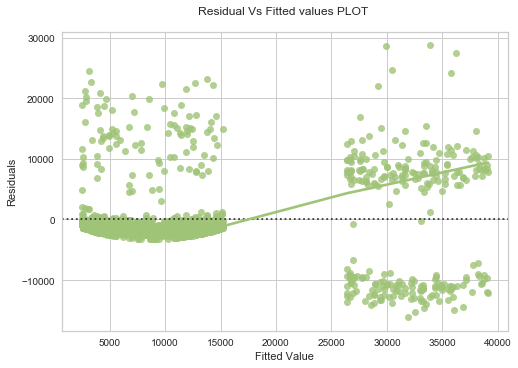

In [97]:
ax = sns.residplot(predictions, resid, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()